# DataFrames II: Filtering Data

In [3]:
# import the library
import pandas as pd

## This Module's Dataset + Memory Optimization
_____
- The `pd.to_datetime` method converts a **Series** to hold datetime values.
- The `format` parameter informs pandas of the format that the times are stored in.
- We pass symbols designating the segments of the string. For example, %m means "month" and %d means day.
- The `dt` attribute reveals an object with many datetime-related attributes and methods.
- The `dt.time` attribute extracts only the time from each value in a datetime **Series**.
- Use the `astype` method to convert the values in a **Series** to another type.
- The `parse_dates` parameter of `read_csv` is an alternate way to parse strings as datetimes.

In [4]:
# loading the data, and check the datatype
employee = pd.read_csv('employees.csv')
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
# checking the 5 rows of the dataset
employee.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
# convert the 'start date' column to datatime datatype
pd.to_datetime(employee['Start Date'], format='%m/%d/%Y')

0     1993-08-06
1     1996-03-31
2     1993-04-23
3     2005-03-04
4     1998-01-24
         ...    
995   2014-11-23
996   1984-01-31
997   2013-05-20
998   2013-04-20
999   2012-05-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]

In [5]:
# Assigning the data types to dataframe
employee['Start Date']= pd.to_datetime(employee['Start Date'], format='%m/%d/%Y')

In [6]:
# confirming the changes of 'Start Date' column datatype to datatime datatypes after the change.
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [7]:
# converting the 'Last Login Time' column to timestamp datatypes.
# Notice the after the conversion of the 'Last Login Time, the datatype still read the object

pd.to_datetime(employee['Last Login Time'], format='%H:%M %p').dt.time

0      12:42:00
1      06:53:00
2      11:17:00
3      01:00:00
4      04:47:00
         ...   
995    06:09:00
996    06:30:00
997    12:39:00
998    04:45:00
999    06:24:00
Name: Last Login Time, Length: 1000, dtype: object

In [8]:
# re-assigning the 'Last Login Time' column to timestamp datatypes to the dataframe
employee['Last Login Time'] = pd.to_datetime(employee['Last Login Time'], format='%H:%M %p').dt.time

In [9]:
# checking the dataframe datatypes after the conversion of the time frame.
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [10]:
# converting the "Senior Management" column to boolean with the astype()
employee['Senior Management'].astype(bool)

0       True
1       True
2      False
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999     True
Name: Senior Management, Length: 1000, dtype: bool

In [11]:
# Re-assigning the "Senior Management" column to the dataframe.
employee['Senior Management']= employee['Senior Management'].astype(bool)

In [12]:
# converting the Gender column to category data type
employee['Gender'].astype('category')

0        Male
1        Male
2      Female
3        Male
4        Male
        ...  
995       NaN
996      Male
997      Male
998      Male
999      Male
Name: Gender, Length: 1000, dtype: category
Categories (2, object): ['Female', 'Male']

In [13]:
# Re-assigning the Gender column to the dataframe
employee['Gender'] = employee['Gender'].astype('category')
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    category      
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   bool          
 7   Team               957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 49.1+ KB


kindly note that the dataset used in this module has been optimized for memory usage. The total memory usgae pf the dataset reduce from 62.6+ KB tto 49.1 KB.

In [14]:
employee.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services


## Filter A DataFrame  Based On A Condition
_____
- Pandas needs a **Series** of Booleans to perform a filter.
- Pass the Boolean Series inside square brackets after the **DataFrame**.
- We can generate a Boolean Series using a wide variety of operations (equality, inequality, less than, greater than, inclusion, etc)

In [15]:
employee

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,06:09:00,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,04:45:00,60500,11.985,False,Business Development


In [16]:
# filter the dataframe to show only Male employees
employee['Gender']=='Male'

0       True
1       True
2      False
3       True
4       True
       ...  
995    False
996     True
997     True
998     True
999     True
Name: Gender, Length: 1000, dtype: bool

In [17]:
# after the boolean filter, we can assign the filter to the dataframe
# This filter only the male rows in the dataframe
employee[employee['Gender']=='Male']

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,2013-06-21,05:47:00,98874,4.479,True,Marketing
996,Phillip,Male,1984-01-31,06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,04:45:00,60500,11.985,False,Business Development


In [18]:
# filtering for finance team from the dataframe
employee[employee['Team']=='Finance']

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
14,Kimberly,Female,1999-01-14,07:13:00,41426,14.543,True,Finance
46,Bruce,Male,2009-11-28,10:47:00,114796,6.796,False,Finance
...,...,...,...,...,...,...,...,...
907,Elizabeth,Female,1998-07-27,11:12:00,137144,10.081,False,Finance
954,Joe,Male,1980-01-19,04:06:00,119667,1.148,True,Finance
987,Gloria,Female,2014-12-08,05:08:00,136709,10.331,True,Finance
992,Anthony,Male,2011-10-16,08:35:00,112769,11.625,True,Finance


In [19]:
# filtering for the team that is not finance
columm_not_finance = employee['Team']!='Finance'

# filtering for the team that is not finance
other_staff_but_finance = employee[columm_not_finance]

other_staff_but_finance.head()

other_staff_but_finance.nunique()


First Name           199
Gender                 2
Start Date           873
Last Login Time      519
Salary               894
Bonus %              872
Senior Management      2
Team                   9
dtype: int64

In [20]:
# filtering the senior managemet team who is a boolean value of True does not require  equal to True
employee[employee['Senior Management']]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
6,Ruby,Female,1987-08-17,04:20:00,65476,10.012,True,Product
...,...,...,...,...,...,...,...,...
991,Rose,Female,2002-08-25,05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,08:35:00,112769,11.625,True,Finance
993,Tina,Female,1997-05-15,03:53:00,56450,19.040,True,Engineering
994,George,Male,2013-06-21,05:47:00,98874,4.479,True,Marketing


In [21]:
# filter for a datetime range
employee[employee['Start Date']<='1985-01-01']

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
10,Louise,Female,1980-08-12,09:01:00,63241,15.132,True,NaN
12,Brandon,Male,1980-12-01,01:08:00,112807,17.492,True,Human Resources
18,Diana,Female,1981-10-23,10:27:00,132940,19.082,False,Client Services
28,Terry,Male,1981-11-27,06:30:00,124008,13.464,True,Client Services
37,Linda,Female,1981-10-19,08:49:00,57427,9.557,True,Client Services
...,...,...,...,...,...,...,...,...
982,Rose,Female,1982-04-06,10:43:00,91411,8.639,True,Human Resources
983,John,Male,1982-12-23,10:35:00,146907,11.738,False,Engineering
985,Stephen,NaN,1983-07-10,08:10:00,85668,1.909,False,Legal
986,Donna,Female,1982-11-26,07:04:00,82871,17.999,False,Marketing


In [22]:
# Filtering for the time
# We will use `datetime` function to extract time

import datetime as dt


employee['Last Login Time'] > dt.time(12,0,0)


0       True
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999    False
Name: Last Login Time, Length: 1000, dtype: bool

In [23]:
employee[employee['Last Login Time'] > dt.time(12,0,0)]


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
34,Jerry,Male,2004-01-10,12:56:00,95734,19.096,False,Client Services
49,Chris,NaN,1980-01-24,12:13:00,113590,3.055,False,Sales
61,Denise,Female,2001-11-06,12:03:00,106862,3.699,False,Business Development
76,Margaret,Female,1988-09-10,12:42:00,131604,7.353,True,Distribution
...,...,...,...,...,...,...,...,...
945,Gerald,NaN,1989-04-15,12:44:00,93712,17.426,True,Distribution
956,Beverly,Female,1986-10-17,12:51:00,80838,8.115,False,Engineering
962,Jonathan,Male,2013-08-21,12:45:00,121797,16.923,False,Product
980,Kimberly,Female,2013-01-26,12:57:00,46233,8.862,True,Engineering


## Filter with More than One Condition (AND)
- Add the `&` operator in between two Boolean **Series** to filter by multiple conditions.
- We can assign the **Series** to variables to make the syntax more readable.

In [24]:
employee

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,06:09:00,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,04:45:00,60500,11.985,False,Business Development


In [25]:
# filter for employees who works in finance

# step 1: identify female employee
(employee['Gender']=='Female')

# step 2: identify people who works in finance
(employee['Team'] =='Finance')

# combine all of the two together
(employee['Gender']=='Female') & (employee['Team'] =='Finance')

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [26]:
# assign the above to the dataframe
female_finance_team = employee[(employee['Gender']=='Female') & (employee['Team'] =='Finance')]
female_finance_team.head(18)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
14,Kimberly,Female,1999-01-14,07:13:00,41426,14.543,True,Finance
67,Rachel,Female,1999-08-16,06:53:00,51178,9.735,True,Finance
84,Doris,Female,2004-08-20,05:51:00,83072,7.511,False,Finance
96,Cynthia,Female,1994-03-21,08:34:00,142321,1.737,False,Finance
100,Melissa,Female,2005-06-21,06:33:00,48109,14.995,False,Finance
103,Phyllis,Female,1996-10-11,09:30:00,136984,8.932,True,Finance
105,Kathy,Female,1996-03-09,04:33:00,91712,8.567,False,Finance
142,Elizabeth,Female,2003-10-09,05:53:00,146129,5.687,False,Finance


In [27]:
# another example
old_staff = employee['Start Date'] > '1985-01-01'
high_bonus = employee['Bonus %'] > 10


# combining the two information together
higest_old_staff_paid = employee[old_staff & high_bonus]


higest_old_staff_paid

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
5,Dennis,Male,1987-04-18,01:35:00,115163,10.125,False,Legal
6,Ruby,Female,1987-08-17,04:20:00,65476,10.012,True,Product
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
8,Angela,Female,2005-11-22,06:29:00,95570,18.523,True,Engineering
...,...,...,...,...,...,...,...,...
992,Anthony,Male,2011-10-16,08:35:00,112769,11.625,True,Finance
993,Tina,Female,1997-05-15,03:53:00,56450,19.040,True,Engineering
995,Henry,NaN,2014-11-23,06:09:00,132483,16.655,False,Distribution
998,Larry,Male,2013-04-20,04:45:00,60500,11.985,False,Business Development


In [28]:
file = r'/Users/teslim/OneDrive/1_uk_2024_election.csv'
uk_election = pd.read_csv(file, encoding='latin1')
uk_election.head()

,CONSTITUENCY,REGION,2019,2024,TURNOUT %,SHARE %
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4


In [29]:
labour_party_2019 = uk_election['2019']=='Labour'
labour_party_2024 = uk_election['2024']=='Labour'


number_of_labour_retain = uk_election[labour_party_2019 & labour_party_2024]
number_of_labour_retain

,CONSTITUENCY,REGION,2019,2024,TURNOUT %,SHARE %
6,Chesterfield,East Midlands,Labour,Labour,58.5,46.5
10,Derby South,East Midlands,Labour,Labour,51.2,38.8
25,Leicester West,East Midlands,Labour,Labour,47.8,44.6
38,Nottingham East,East Midlands,Labour,Labour,52.5,53.6
39,Nottingham North & Kimberley,East Midlands,Labour,Labour,47.5,47.1
...,...,...,...,...,...,...
638,Sheffield Central,Yorkshire and the Humber,Labour,Labour,52.5,52.1
639,Sheffield Hallam,Yorkshire and the Humber,Labour,Labour,70.7,46.3
640,Sheffield Heeley,Yorkshire and the Humber,Labour,Labour,52.4,55.2
641,Sheffield South East,Yorkshire and the Humber,Labour,Labour,48.2,52.3


In [30]:
labour_con_2019 = uk_election['2019']=='Conservative'
labour_con_2024 = uk_election['2024']=='Conservative'


number_of_con_retain = uk_election[labour_con_2019 & labour_con_2024]
number_of_con_retain

,CONSTITUENCY,REGION,2019,2024,TURNOUT %,SHARE %
8,Daventry,East Midlands,Conservative,Conservative,65.6,33.7
16,Gainsborough,East Midlands,Conservative,Conservative,61.6,35.6
18,Grantham & Bourne,East Midlands,Conservative,Conservative,62.9,36.4
19,"Harborough, Oadby & Wigston",East Midlands,Conservative,Conservative,65.1,36.9
21,Hinckley & Bosworth,East Midlands,Conservative,Conservative,62.5,35.6
...,...,...,...,...,...,...
618,Keighley & Ilkley,Yorkshire and the Humber,Conservative,Conservative,62.1,40.3
631,Richmond & Northallerton,Yorkshire and the Humber,Conservative,Conservative,65.7,47.5
643,Skipton & Ripon,Yorkshire and the Humber,Conservative,Conservative,67.4,35.2
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3


array([[<Axes: title={'center': 'SHARE %'}>]], dtype=object)

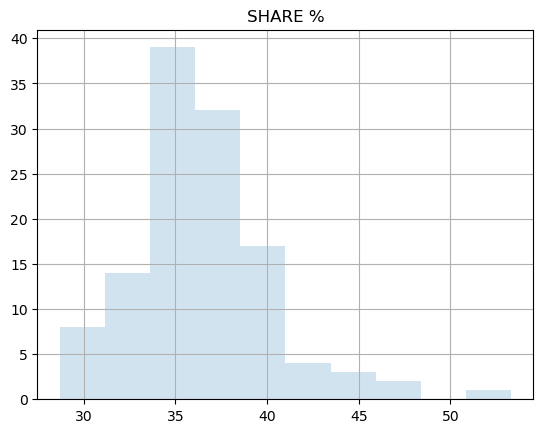

In [31]:
number_of_con_retain[['SHARE %', '2019']].hist(alpha=0.2)

## Filter with More than One Condition (OR)
- Use the `|` operator in between two Boolean **Series** to filter by *either* condition.

In [6]:
employee

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [7]:
is_management = employee['Senior Management']
started_80s = employee['Start Date']<'1990-01-01'

# confirming the managemet who start earlier than 1990
employee[is_management | started_80s]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
...,...,...,...,...,...,...,...,...
993,Tina,Female,5/15/1997,3:53 PM,56450,19.040,True,Engineering
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance


## The isin Method
- The `isin` **Series** method accepts a collection object like a list, tuple, or **Series**.
- The method returns True for a row if its value is found in the collection.

In [8]:
employee

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [9]:
collection = employee['Team'].isin(['Finance', 'Product', 'Sales'])

employee[collection]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
13,Gary,Male,1/27/2008,11:40 PM,109831,5.831,False,Sales
...,...,...,...,...,...,...,...,...
987,Gloria,Female,12/8/2014,5:08 AM,136709,10.331,True,Finance
992,Anthony,Male,10/16/2011,8:35 AM,112769,11.625,True,Finance
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product


In [11]:
df = pd.read_csv(r'/Users/teslim/OneDrive/generaldata/17-premier-league-matches.csv')
df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


In [12]:
df.dtypes

Season_End_Year     int64
Wk                  int64
Date               object
Home               object
HomeGoals           int64
AwayGoals           int64
Away               object
FTR                object
dtype: object

In [13]:
df.dtypes[df.dtypes == 'object'].index

Index(['Date', 'Home', 'Away', 'FTR'], dtype='object')

In [14]:
categorical = df.dtypes[df.dtypes == 'object'].index

In [15]:
for col in categorical:
    print(col)
    df[col] = df[col].str.lower()

df[categorical].head()

Date
Home
Away
FTR


,Date,Home,Away,FTR
0,1992-08-15,coventry city,middlesbrough,h
1,1992-08-15,leeds united,wimbledon,h
2,1992-08-15,sheffield utd,manchester utd,h
3,1992-08-15,crystal palace,blackburn,d
4,1992-08-15,arsenal,norwich city,a


In [16]:
df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,coventry city,2,1,middlesbrough,h
1,1993,1,1992-08-15,leeds united,2,1,wimbledon,h
2,1993,1,1992-08-15,sheffield utd,2,1,manchester utd,h
3,1993,1,1992-08-15,crystal palace,3,3,blackburn,d
4,1993,1,1992-08-15,arsenal,2,4,norwich city,a
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,everton,1,0,bournemouth,h
12022,2023,38,2023-05-28,leicester city,2,1,west ham,h
12023,2023,38,2023-05-28,aston villa,2,1,brighton,h
12024,2023,38,2023-05-28,leeds united,1,4,tottenham,a


In [18]:
expensive = df['FTR'].isin(['h', 'a'])

df[expensive]

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,coventry city,2,1,middlesbrough,h
1,1993,1,1992-08-15,leeds united,2,1,wimbledon,h
2,1993,1,1992-08-15,sheffield utd,2,1,manchester utd,h
4,1993,1,1992-08-15,arsenal,2,4,norwich city,a
9,1993,1,1992-08-16,nott'ham forest,1,0,liverpool,h
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,everton,1,0,bournemouth,h
12022,2023,38,2023-05-28,leicester city,2,1,west ham,h
12023,2023,38,2023-05-28,aston villa,2,1,brighton,h
12024,2023,38,2023-05-28,leeds united,1,4,tottenham,a


In [19]:
df.select_dtypes(include=['object'])

,Date,Home,Away,FTR
0,1992-08-15,coventry city,middlesbrough,h
1,1992-08-15,leeds united,wimbledon,h
2,1992-08-15,sheffield utd,manchester utd,h
3,1992-08-15,crystal palace,blackburn,d
4,1992-08-15,arsenal,norwich city,a
...,...,...,...,...
12021,2023-05-28,everton,bournemouth,h
12022,2023-05-28,leicester city,west ham,h
12023,2023-05-28,aston villa,brighton,h
12024,2023-05-28,leeds united,tottenham,a


In [28]:
df[df['Home'].isin(['aston villa'])]

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
15,1993,2,1992-08-19,aston villa,1,1,leeds united,d
28,1993,3,1992-08-22,aston villa,1,1,southampton,d
63,1993,6,1992-09-02,aston villa,1,3,chelsea,a
71,1993,7,1992-09-05,aston villa,3,0,crystal palace,h
90,1993,9,1992-09-19,aston villa,4,2,liverpool,h
...,...,...,...,...,...,...,...,...
11934,2023,30,2023-04-08,aston villa,2,0,nott'ham forest,h
11942,2023,31,2023-04-15,aston villa,3,0,newcastle utd,h
11961,2023,33,2023-04-25,aston villa,1,0,fulham,h
11994,2023,36,2023-05-13,aston villa,2,1,tottenham,h


In [21]:
file = r'/Users/teslim/OneDrive/generaldata/6_cleanace_financials_data.csv'
cl = pd.read_csv(file)
cl

,Class,ACCT,LEDGER,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Income statement,Maryland,Revenue,"8,215,560.47","6,219,423.82","7,825,835.09","7,729,751.62","8,028,021.76","6,614,444.62","7,694,189.00","8,930,779.50","7,968,584.00","7,713,938.00","8,126,173.50","8,750,062.00"
1,Income statement,Festac,Revenue,"4,588,868.74","3,629,114.00","4,212,707.59","3,862,587.25","4,115,483.74","3,312,023.25","4,287,521.00","4,046,863.75","3,333,375.00","3,772,280.00","3,635,478.00","4,196,635.00"
2,Income statement,Ogudu,Revenue,"3,435,556.75","2,862,071.00","2,864,123.50","3,565,058.25","3,339,617.25","2,906,029.00","3,355,540.20","3,479,803.25","2,975,709.10","3,334,714.00","3,539,899.60","3,690,341.25"
3,Income statement,Gbagada,Revenue,"402,593.50","264,692.00","360,857.50","480,453.00","396,217.00","398,944.00","475,485.00","560,414.00","497,833.00","667,439.50","577,579.00","643,587.50"
4,Income statement,Surulere,Revenue,"371,733.50","260,484.00","292,117.50","185,880.00","226,000.00","316,192.00","8,550.00",Nil,Nil,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Balance sheet,Witholding Tax_Rent_2019,Tax Liability,"8,104,916.09","1,161,832.39","1,161,832.39","1,394,198.87","1,673,038.64","2,007,646.37","2,409,175.64","2,891,010.77","3,469,212.93","4,163,055.51","4,995,666.62","5,994,799.94"
121,Balance sheet,VAT Payable Account,Tax Liability,"4,602,261.68","1,318,181.38","1,512,372.63","1,814,847.16","2,177,816.59","2,613,379.90","3,136,055.89","3,763,267.06","4,515,920.48","5,419,104.57","6,502,925.48","7,803,510.58"
122,Balance sheet,PAYE Account,Tax Liability,"44,420.00","41,741.00","42,700.00","51,240.00","61,488.00","73,785.60","88,542.72","106,251.26","127,501.52","153,001.82","183,602.18","220,322.62"
123,Balance sheet,BOI Finance_Due More than 12 months,Non Current Liability,7126855.788,"8,552,226.95",11887170.74,"14,264,604.89","17,117,525.87","20,541,031.04","24,649,237.25","29,579,084.70","35,494,901.63","42,593,881.96","51,112,658.35","61,335,190.03"


In [22]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   125 non-null    object
 1   ACCT    125 non-null    object
 2   LEDGER  125 non-null    object
 3   Jan     113 non-null    object
 4   Feb     113 non-null    object
 5   Mar     113 non-null    object
 6   Apr     113 non-null    object
 7   May     113 non-null    object
 8   Jun     115 non-null    object
 9   Jul     115 non-null    object
 10  Aug     116 non-null    object
 11  Sep     116 non-null    object
 12  Oct     115 non-null    object
 13  Nov     115 non-null    object
 14  Dec     119 non-null    object
dtypes: object(15)
memory usage: 14.8+ KB


In [23]:
cl.isnull().sum()

Class      0
ACCT       0
LEDGER     0
Jan       12
Feb       12
Mar       12
Apr       12
May       12
Jun       10
Jul       10
Aug        9
Sep        9
Oct       10
Nov       10
Dec        6
dtype: int64

In [24]:
cl['Jan'].fillna(0)

0      8,215,560.47
1      4,588,868.74
2      3,435,556.75
3        402,593.50
4        371,733.50
           ...     
120    8,104,916.09
121    4,602,261.68
122       44,420.00
123     7126855.788
124     7126855.788
Name: Jan, Length: 125, dtype: object

In [85]:
for col in cl.columns:
    print(col)
    cl[col] = cl[col].fillna(0)

cl.isna().sum()

Class
ACCT
LEDGER
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec


Class     0
ACCT      0
LEDGER    0
Jan       0
Feb       0
Mar       0
Apr       0
May       0
Jun       0
Jul       0
Aug       0
Sep       0
Oct       0
Nov       0
Dec       0
dtype: int64

In [83]:
cl.head()

,Class,ACCT,LEDGER,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Income statement,Maryland,Revenue,"8,215,560.47","6,219,423.82","7,825,835.09","7,729,751.62","8,028,021.76","6,614,444.62","7,694,189.00","8,930,779.50","7,968,584.00","7,713,938.00","8,126,173.50","8,750,062.00"
1,Income statement,Festac,Revenue,"4,588,868.74","3,629,114.00","4,212,707.59","3,862,587.25","4,115,483.74","3,312,023.25","4,287,521.00","4,046,863.75","3,333,375.00","3,772,280.00","3,635,478.00","4,196,635.00"
2,Income statement,Ogudu,Revenue,"3,435,556.75","2,862,071.00","2,864,123.50","3,565,058.25","3,339,617.25","2,906,029.00","3,355,540.20","3,479,803.25","2,975,709.10","3,334,714.00","3,539,899.60","3,690,341.25"
3,Income statement,Gbagada,Revenue,"402,593.50","264,692.00","360,857.50","480,453.00","396,217.00","398,944.00","475,485.00","560,414.00","497,833.00","667,439.50","577,579.00","643,587.50"
4,Income statement,Surulere,Revenue,"371,733.50","260,484.00","292,117.50","185,880.00","226,000.00","316,192.00","8,550.00",Nil,Nil,0,0,0


In [29]:
column = ['jan']

## The isnull and notnull Methods
- The `isnull` method returns True for `NaN` values in a **Series**.
- The `notnull` method returns True for present values in a **Series**.

## The between Method
- The `between` method returns True if a **Series** value is found within its range.

In [31]:
employee

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [41]:
employee[~employee['Salary'].between(10000, 50000)]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [40]:
employee.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

## The duplicated Method
- The `duplicated` method returns True if a **Series** value is a duplicate.
- Pandas will mark one occurrence of a repeated value as a non-duplicate.
- Use the `keep` parameter to designate whether the first or last occurrence of a repeated value should be considered the "non-duplicate".
- Pass False to the `keep` parameter to mark all occurrences of repeated values as duplicates.
- Use the tilde symbol (`~`) to invert a **Series's** values. Trues will become Falses, and Falses will become trues.

In [36]:
employee[employee['First Name'].duplicated(keep='last')]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
959,Albert,Male,9/19/1992,2:35 AM,45094,5.850,True,Business Development
960,Stephen,Male,10/29/1989,11:34 PM,93997,18.093,True,Business Development
970,Alice,Female,9/3/1988,8:54 PM,63571,15.397,True,Product
973,Russell,Male,5/10/2013,11:08 PM,137359,11.105,False,Business Development


In [37]:
employee[employee['First Name'].duplicated(keep='first')]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
23,NaN,Male,6/14/2012,4:19 PM,125792,5.042,NaN,NaN
25,NaN,Male,10/8/2012,1:12 AM,37076,18.576,NaN,Client Services
32,NaN,Male,8/21/1998,2:27 PM,122340,6.417,NaN,NaN
34,Jerry,Male,1/10/2004,12:56 PM,95734,19.096,False,Client Services
39,NaN,Male,1/29/2016,2:33 AM,122173,7.797,NaN,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


## The drop_duplicates Method
- The `drop_duplicates` method deletes rows with duplicate values.
- By default, it will remove a row if *all* of its values are shared with another row.
- The `subset` parameter configures the columns to look for duplicate values within.
- Pass a list to `subset` parameter to look for duplicates across multiple columns.

## The unique and nunique Methods
- The `unique` method on a **Series** returns a collection of its unique values. The method does not exist on a **DataFrame**.
- The `nunique` method returns a *count* of the number of unique values in the **Series**/**DataFrame**.
- The `dropna` parameter configures whether to include or exclude missing (`NaN`) values.